In [2]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [3]:
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [12]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

ERROR! Session/line number was not unique in database. History logging moved to new session 1241


Label: 6


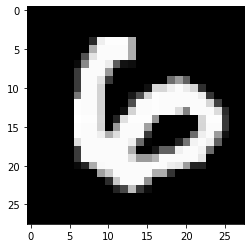

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[9000]))
plt.imshow(X_train[9000], cmap='gray')

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [15]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [17]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[10])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


label for each of the below image: 5
label for each of the below image: 0
label for each of the below image: 4
label for each of the below image: 1
label for each of the below image: 9
label for each of the below image: 2
label for each of the below image: 1
label for each of the below image: 3
label for each of the below image: 1
label for each of the below image: 4


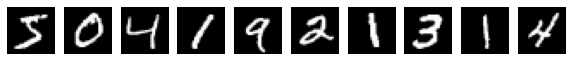

In [18]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [20]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

model.fit(x=X_train, y=y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 10s 174us/sample - loss: 0.6623 - accuracy: 0.8310 - val_loss: 0.3577 - val_accuracy: 0.9004
Epoch 2/2
60000/60000 [==============================] - 9s 150us/sample - loss: 0.3352 - accuracy: 0.9071 - val_loss: 0.2903 - val_accuracy: 0.9193


In [21]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 82us/sample - loss: 0.2903 - accuracy: 0.9193


[0.2903292257606983, 0.9193]

### Hyperparameter Tuning

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [27]:
X_train = X_train.reshape(60000, 784)
print(X_train.shape)
X_test = X_test.reshape(10000, 784)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [29]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

label for each of the below image: 5
label for each of the below image: 0
label for each of the below image: 4
label for each of the below image: 1
label for each of the below image: 9
label for each of the below image: 2
label for each of the below image: 1
label for each of the below image: 3
label for each of the below image: 1
label for each of the below image: 4


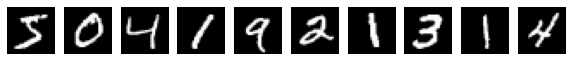

In [30]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])    

    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

In [32]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

In [33]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

Train on 60000 samples
60000/60000 [==============================] - 3s 48us/sample - loss: 2.2981 - accuracy: 0.1147


In [34]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

Train on 60000 samples
60000/60000 [==============================] - 3s 43us/sample - loss: 2379.8086 - accuracy: 0.0787


In [35]:
X_train_subset = X_train[0:20]

In [36]:
y_train_subset = y_train[0:20]

In [37]:
X_train = X_train_subset
y_train = y_train_subset

In [38]:
X_train.shape

(20, 784)

In [39]:
y_train.shape

(20, 10)

In [40]:
lr = 0.001
Lambda = 0
train_and_test_loop(20, lr, Lambda)

Train on 20 samples
Epoch 1/20
20/20 [==============================] - 1s 28ms/sample - loss: 2.3081 - accuracy: 0.1000
Epoch 2/20
20/20 [==============================] - 0s 284us/sample - loss: 2.3054 - accuracy: 0.1000
Epoch 3/20
20/20 [==============================] - 0s 161us/sample - loss: 2.3003 - accuracy: 0.1000
Epoch 4/20
20/20 [==============================] - 0s 255us/sample - loss: 2.2931 - accuracy: 0.2000
Epoch 5/20
20/20 [==============================] - 0s 592us/sample - loss: 2.2839 - accuracy: 0.2000
Epoch 6/20
20/20 [==============================] - 0s 280us/sample - loss: 2.2731 - accuracy: 0.2000
Epoch 7/20
20/20 [==============================] - 0s 0s/sample - loss: 2.2608 - accuracy: 0.2500
Epoch 8/20
20/20 [==============================] - 0s 530us/sample - loss: 2.2473 - accuracy: 0.2500
Epoch 9/20
20/20 [==============================] - 0s 746us/sample - loss: 2.2327 - accuracy: 0.2500
Epoch 10/20
20/20 [==============================] - 0s 368us/samp

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [43]:
X_train = X_train.reshape(60000, 784)
print(X_train.shape)
X_test = X_test.reshape(10000, 784)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [44]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [45]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

In [46]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/sample - loss: 2.3766 - accuracy: 0.0901
Epoch 2/20
60000/60000 [==============================] - 1s 23us/sample - loss: 2.3765 - accuracy: 0.0900
Epoch 3/20
60000/60000 [==============================] - 1s 25us/sample - loss: 2.3765 - accuracy: 0.0900s - loss: 2.3753 - 
Epoch 4/20
60000/60000 [==============================] - 1s 24us/sample - loss: 2.3764 - accuracy: 0.0900
Epoch 5/20
60000/60000 [==============================] - 1s 25us/sample - loss: 2.3764 - accuracy: 0.0900
Epoch 6/20
60000/60000 [==============================] - 1s 25us/sample - loss: 2.3763 - accuracy: 0.0901
Epoch 7/20
60000/60000 [==============================] - 1s 24us/sample - loss: 2.3763 - accuracy: 0.0901s - loss: 2.3769 
Epoch 8/20
60000/60000 [==============================] - 2s 25us/sample - loss: 2.3762 - accuracy: 0.0901
Epoch 9/20
60000/60000 [==============================] - 1s 25us/sample - loss: 2.37

In [47]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(10, lr, Lambda)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/sample - loss: nan - accuracy: 0.0977
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: nan - accuracy: 0.0987
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: nan - accuracy: 0.0987
Epoch 4/10
60000/60000 [==============================] - 1s 23us/sample - loss: nan - accuracy: 0.0987
Epoch 5/10
60000/60000 [==============================] - 1s 22us/sample - loss: nan - accuracy: 0.0987
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: nan - accuracy: 0.0987
Epoch 7/10
60000/60000 [==============================] - 1s 21us/sample - loss: nan - accuracy: 0.0987
Epoch 8/10
60000/60000 [==============================] - 1s 22us/sample - loss: nan - accuracy: 0.0987
Epoch 9/10
60000/60000 [==============================] - 1s 22us/sample - loss: nan - accuracy: 0.0987
Epoch 10/10
60000/60000 [================

In [48]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(10, lr, Lambda)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/sample - loss: nan - accuracy: 0.0987
Epoch 2/10
60000/60000 [==============================] - 2s 25us/sample - loss: nan - accuracy: 0.0987
Epoch 3/10
60000/60000 [==============================] - 1s 22us/sample - loss: nan - accuracy: 0.0987
Epoch 4/10
60000/60000 [==============================] - 2s 26us/sample - loss: nan - accuracy: 0.0987
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: nan - accuracy: 0.0987
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: nan - accuracy: 0.0987
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: nan - accuracy: 0.0987
Epoch 8/10
60000/60000 [==============================] - 2s 26us/sample - loss: nan - accuracy: 0.09871s - loss: nan 
Epoch 9/10
60000/60000 [==============================] - 2s 26us/sample - loss: nan - accuracy: 0.0987
Epoch 10/10
60000/60000 [=

In [49]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(10, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

ERROR! Session/line number was not unique in database. History logging moved to new session 1243
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/sample - loss: 1.5287 - accuracy: 0.6536s - loss: 2.076
Epoch 2/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2860 - accuracy: 0.9179s - l
Epoch 3/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2091 - accuracy: 0.9395s
Epoch 4/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1695 - accuracy: 0.9498
Epoch 5/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1444 - accuracy: 0.9578
Epoch 6/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1233 - accuracy: 0.9647
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1153 - accuracy: 0.9651s - loss: 0.1
Epoch 8/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1100 - accurac

In [50]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop1(10, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/sample - loss: 2.0627 - accuracy: 0.4336
Epoch 2/10
60000/60000 [==============================] - 2s 25us/sample - loss: 1.2741 - accuracy: 0.7912
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.8001 - accuracy: 0.8370
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.6279 - accuracy: 0.8603
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.5495 - accuracy: 0.8745
Epoch 6/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5042 - accuracy: 0.8836
Epoch 7/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4742 - accuracy: 0.8894
Epoch 8/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4525 - accuracy: 0.8940s - loss: 0.4564 - ac
Epoch 9/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4356 - accuracy: 

In [51]:
lr = 2e-2
Lambda = 1e-4
train_and_test_loop1(10, lr, Lambda)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 15us/sample - loss: 1.0209 - accuracy: 0.7259
Epoch 2/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3508 - accuracy: 0.8999
Epoch 3/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2905 - accuracy: 0.9179
Epoch 4/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.2556 - accuracy: 0.9277
Epoch 5/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.2309 - accuracy: 0.9349
Epoch 6/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2090 - accuracy: 0.9410
Epoch 7/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.1934 - accuracy: 0.9453
Epoch 8/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.1787 - accuracy: 0.9498
Epoch 9/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.1659 - accuracy: 0.9539
Epoch 10/10
60

[0.14743145335912705, 0.95968336]

### Convolution Networks

In [61]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [63]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [64]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [65]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [66]:
from tensorflow.keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [67]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.fit( x=X_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 38s 914us/sample - loss: 0.1329 - accuracy: 0.9603 - val_loss: 0.0656 - val_accuracy: 0.9801
Epoch 2/10
42000/42000 [==============================] - 76s 2ms/sample - loss: 0.0407 - accuracy: 0.9867 - val_loss: 0.0618 - val_accuracy: 0.9830
Epoch 3/10
42000/42000 [==============================] - 79s 2ms/sample - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0530 - val_accuracy: 0.9858
Epoch 4/10
42000/42000 [==============================] - 80s 2ms/sample - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.0641 - val_accuracy: 0.9849
Epoch 5/10
42000/42000 [==============================] - 85s 2ms/sample - loss: 0.0112 - accuracy: 0.9961 - val_loss: 0.0697 - val_accuracy: 0.9831
Epoch 6/10
42000/42000 [==============================] - 74s 2ms/sample - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0768 - val_accuracy: 0.9832
Epoch 7/10
42000/42000 [==============================

In [68]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 225us/sample - loss: 0.0612 - accuracy: 0.9864


[0.06122027632234826, 0.9864]

### Vanilla CNN + Pooling + Dropout

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [70]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

model.fit(x=X_train, y=y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test), callbacks=[callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.1234 - accuracy: 0.9621 - val_loss: 0.0524 - val_accuracy: 0.9820
Epoch 2/2
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0448 - val_accuracy: 0.9865


In [71]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 195us/sample - loss: 0.0448 - accuracy: 0.9865


[0.0447622390615521, 0.9865]

In [ ]:
model.save_weights('my_model.h5')

In [ ]:
model1 = model.load_weights('my_model.h5')